In [5]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
#reading in the data

Orders = pd.read_csv('Orders.csv')

print('The Orders data set has {} rows and {} columns'.format(Orders.shape[0],Orders.shape[1]))

The Orders data set has 51290 rows and 24 columns


In [8]:
#taking a look at the head

Orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [9]:
#info

Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [16]:
#converting to datetime

Orders['Order.Date']=pd.to_datetime(Orders['Order.Date'])
Orders['Ship.Date']=pd.to_datetime(Orders['Ship.Date'])

In [22]:
#converting Sales and Profits to numeric

Orders['Sales'] = Orders['Sales'].str.replace(',', '')
Orders['Sales'] = Orders['Sales'].str.replace('$', '')
Orders['Sales'] = Orders['Sales'].astype(float)

Orders['Profit'] = Orders['Profit'].str.replace(',', '')
Orders['Profit'] = Orders['Profit'].str.replace('$', '')
Orders['Profit'] = Orders['Profit'].astype(float)

count    51290.000000
mean       246.490685
std        487.565388
min          0.440000
25%         30.762500
50%         85.055000
75%        251.055000
max      22638.480000
Name: Sales, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


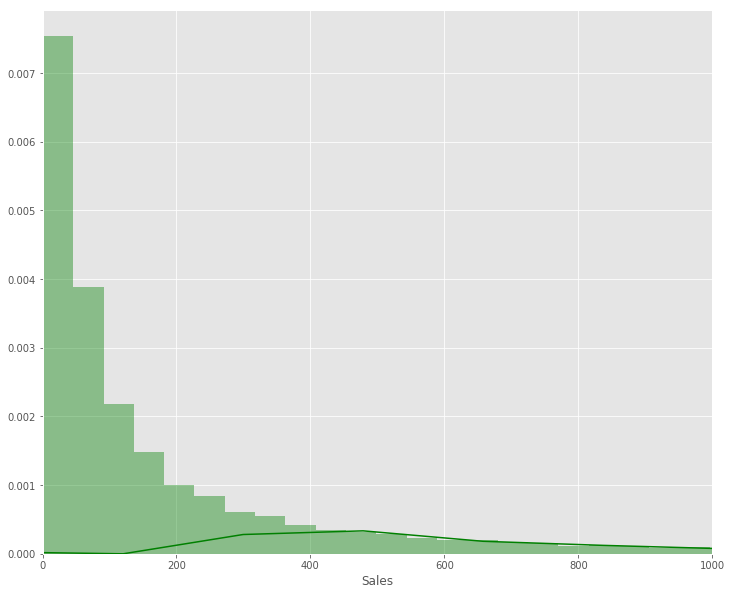

In [36]:
#overview Sales
print(Orders['Sales'].describe())

plt.figure(figsize=(12,10))
plt.xlim((0,1000))
sns.distplot(Orders['Sales'], color='g',bins=500, hist_kws={'alpha':0.4})

In [25]:
Orders['Sales']

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
5        2862.68
6        1822.08
7        5244.84
8         341.96
9          48.71
10         17.94
11       4626.15
12       2616.96
13       2221.80
14       3701.52
15       1869.59
16         12.62
17       7958.58
18       2565.59
19       3409.74
20       1977.72
21        242.94
22       2754.00
23       5273.70
24       1713.84
25       2106.50
26       1715.16
27       3069.74
28        247.84
29       1878.72
          ...   
51260       0.44
51261     823.96
51262     213.48
51263      36.48
51264      47.14
51265     259.96
51266      49.30
51267      61.44
51268       5.34
51269     200.40
51270      17.88
51271      71.12
51272      19.32
51273       5.92
51274      41.64
51275       9.61
51276      22.72
51277      34.13
51278      52.59
51279       5.36
51280      15.98
51281      84.00
51282      58.05
51283      26.94
51284      18.64
51285      65.10
51286      16.72
51287       8.

count    51290.000000
mean        28.610970
std        174.341066
min      -6599.980000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.980000
Name: Profit, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


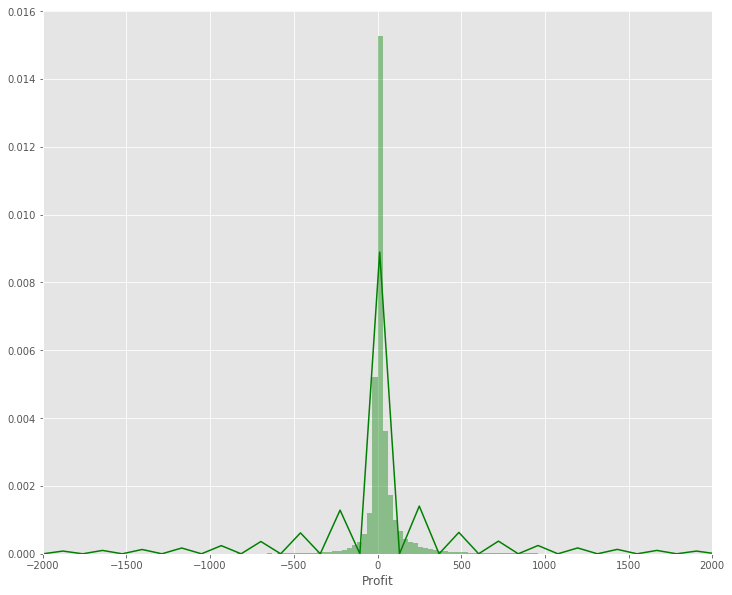

In [39]:
#overview Sales
print(Orders['Profit'].describe())

plt.figure(figsize=(12,10))
plt.xlim((-2000,2000))
sns.distplot(Orders['Profit'], color='g',bins=500, hist_kws={'alpha':0.4})

In [132]:
#seasonal trends

mon_qty = Orders.set_index(Orders['Order.Date']).resample('M').sum()[['Quantity']]
mon_qty['date'] = mon_qty.index

In [133]:
quan2012=mon_qty[(mon_qty['date'] > '2012-01-01') & (mon_qty['date'] < '2013-01-01')]
quan2013=mon_qty[(mon_qty['date'] > '2013-01-01') & (mon_qty['date'] < '2014-01-01')]
quan2014=mon_qty[(mon_qty['date'] > '2014-01-01') & (mon_qty['date'] < '2015-01-01')]
quan2015=mon_qty[(mon_qty['date'] > '2015-01-01') & (mon_qty['date'] < '2016-01-01')]

In [134]:
quan2012['date']=[i[5:7] for i in quan2012['date'].astype(str)]
quan2013['date']=[i[5:7] for i in quan2013['date'].astype(str)]
quan2014['date']=[i[5:7] for i in quan2014['date'].astype(str)]
quan2015['date']=[i[5:7] for i in quan2015['date'].astype(str)]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


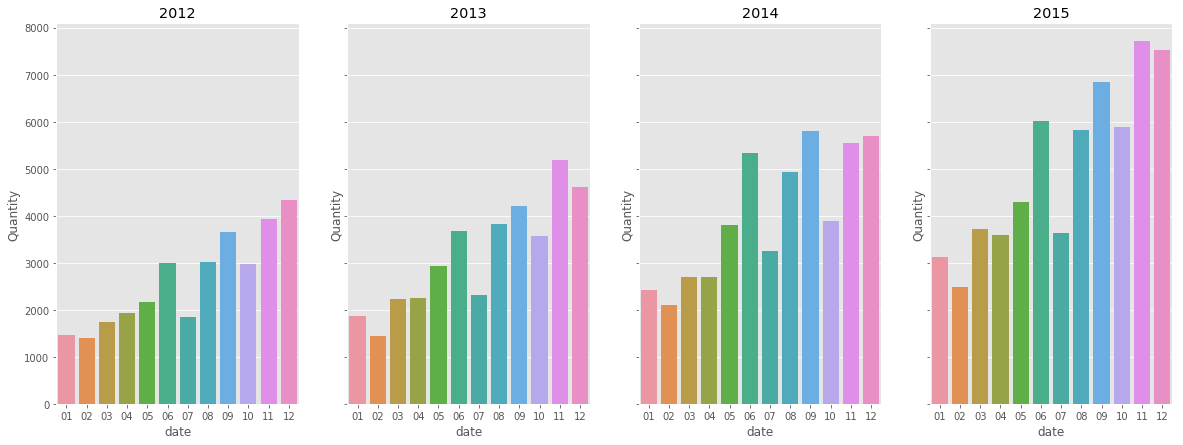

In [142]:
f, axes = plt.subplots(1, 4, figsize=(20,7), sharey=True)
sns.barplot(data=quan2012, x='date', y='Quantity', ax=axes[0]).set_title("2012")
sns.barplot(data=quan2013, x='date', y='Quantity', ax=axes[1]).set_title("2013")
sns.barplot(data=quan2014, x='date', y='Quantity', ax=axes[2]).set_title("2014")
sns.barplot(data=quan2015, x='date', y='Quantity', ax=axes[3]).set_title("2015")


f.show()

In [131]:
quan2012

,Quantity,date
Order.Date,,
2012-01-31,1463,
2012-02-29,1401,
2012-03-31,1745,
2012-04-30,1934,
2012-05-31,2167,
2012-06-30,3002,
2012-07-31,1836,
2012-08-31,3020,
2012-09-30,3644,
